In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots

from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CocaCola_Sales_Rawdata (1).csv")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
temp = data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
data['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
data.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [4]:
data1 = data[["quater", "Sales"]]
data1.head()

,quater,Sales
0,Jan-1986,1734.827000
1,Apr-1986,2244.960999
2,Jul-1986,2533.804993
3,Oct-1986,2154.962997
4,Jan-1987,1547.818996


### EDA

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   quater  42 non-null     object 
 1   Sales   42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data1.isna().sum()

quater    0
Sales     0
dtype: int64

In [7]:
data1[data1.duplicated()].shape

(0, 2)

In [8]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


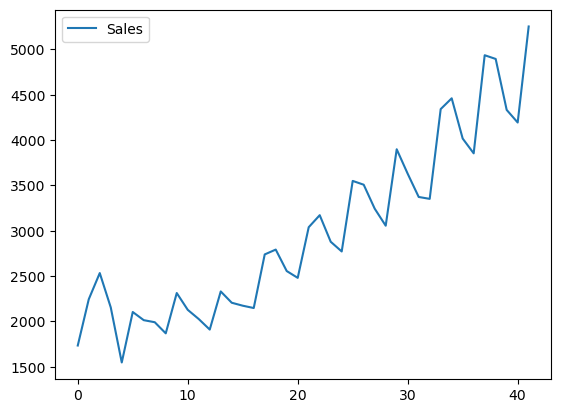

In [9]:
data1.plot()
plt.show()

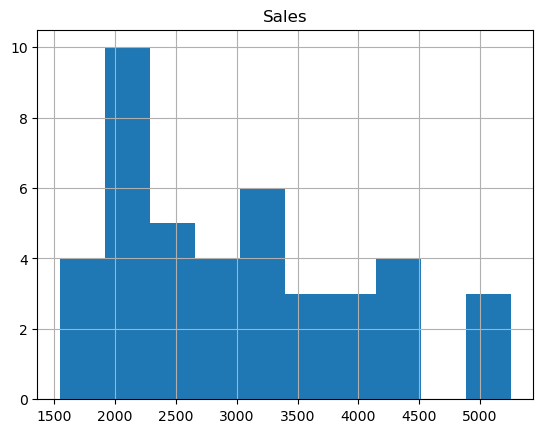

In [10]:
data1.hist()
plt.show()

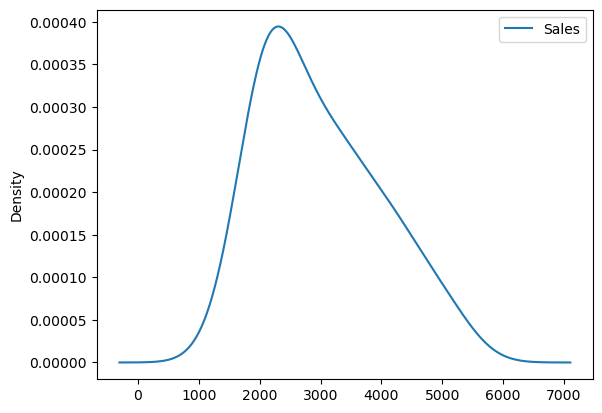

In [11]:
data1.plot(kind="kde")
plt.show()

### Moving Average

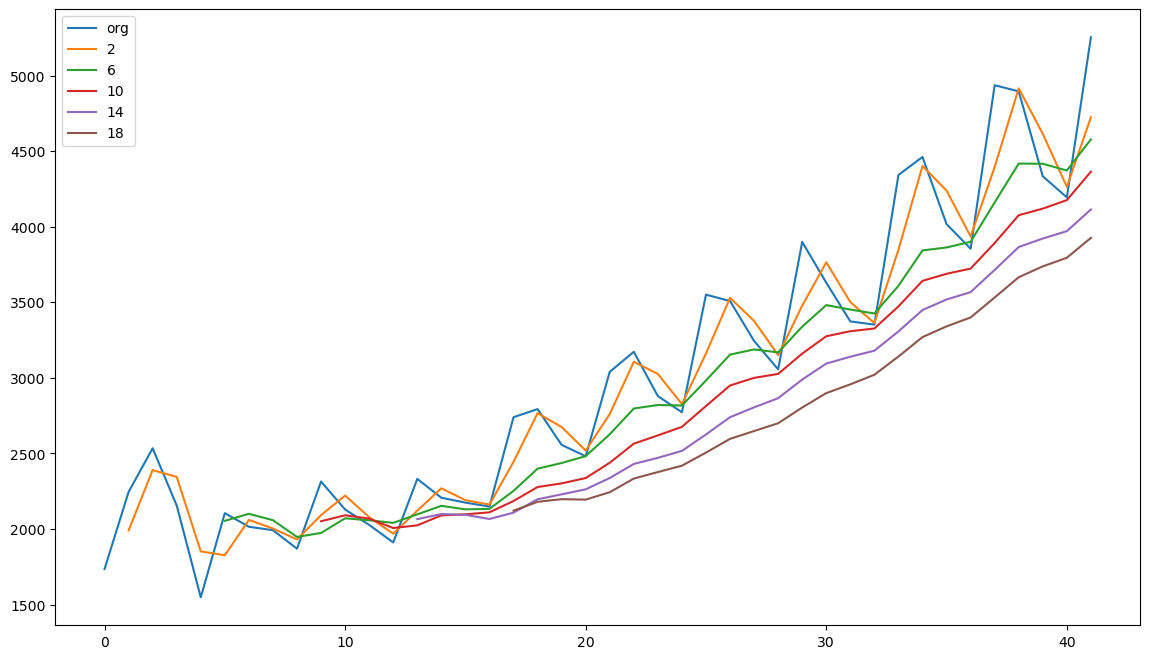

In [12]:
plt.figure(figsize=(14, 8))
data1.Sales.plot(label="org")
for i in range(2, 20, 4):
    data1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

### Time series decomposition plot

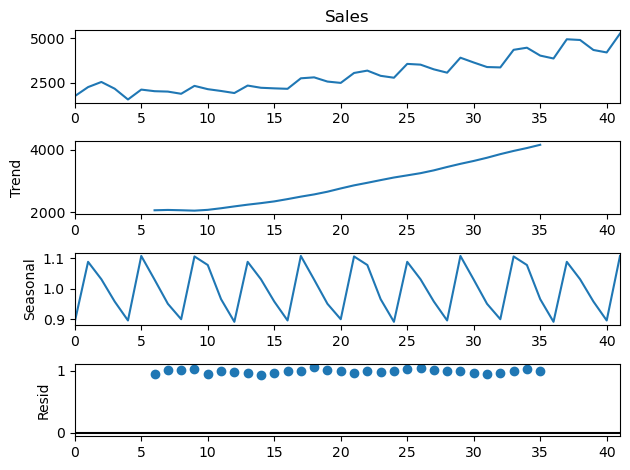

In [13]:
decompose_ts_add = seasonal_decompose(data1.Sales,period=12, model="multiplicative")
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

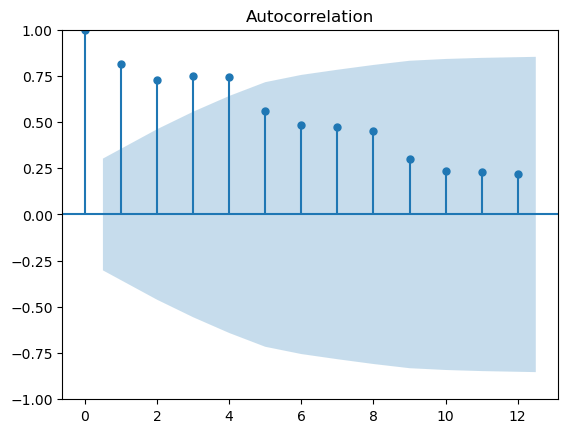

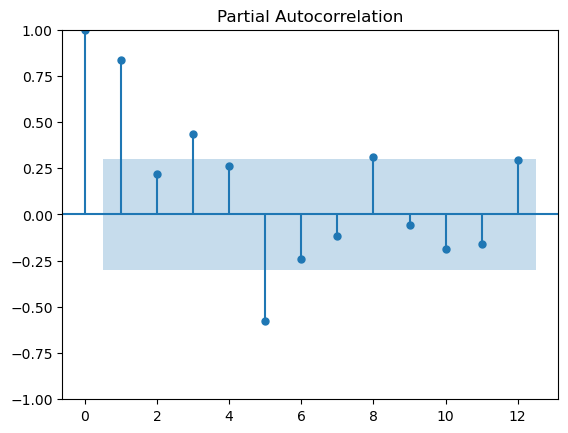

In [14]:
tsa_plots.plot_acf(data1.Sales,lags=12)
tsa_plots.plot_pacf(data1.Sales,lags=12)
plt.show()

### Data preprocessing

In [15]:
months = ['Jan','Apr','Jul','Oct']
p = data1["quater"][0]
p[0:3]
data1['months'] = 0

In [16]:
for i in range(42):
    p = data1["quater"][i]
    data1['months'][i]= p[0:3]

In [17]:
month_dummies = pd.DataFrame(pd.get_dummies(data1['months']))
data1 = pd.concat([data1, month_dummies],axis = 1)
data1.head()

,quater,Sales,months,Apr,Jan,Jul,Oct
0,Jan-1986,1734.827000,Jan,0,1,0,0
1,Apr-1986,2244.960999,Apr,1,0,0,0
2,Jul-1986,2533.804993,Jul,0,0,1,0
3,Oct-1986,2154.962997,Oct,0,0,0,1
4,Jan-1987,1547.818996,Jan,0,1,0,0


In [18]:
data1["t"] = np.arange(1,43)
data1["t_squared"] = data1["t"]*data1["t"]
data1["log_Sales"] = np.log(data1["Sales"])

In [19]:
data1.columns

Index(['quater', 'Sales', 'months', 'Apr', 'Jan', 'Jul', 'Oct', 't',
       't_squared', 'log_Sales'],
      dtype='object')

In [20]:
data1.head()

,quater,Sales,months,Apr,Jan,Jul,Oct,t,t_squared,log_Sales
0,Jan-1986,1734.827000,Jan,0,1,0,0,1,1,7.458663
1,Apr-1986,2244.960999,Apr,1,0,0,0,2,4,7.716443
2,Jul-1986,2533.804993,Jul,0,0,1,0,3,9,7.837477
3,Oct-1986,2154.962997,Oct,0,0,0,1,4,16,7.675529
4,Jan-1987,1547.818996,Jan,0,1,0,0,5,25,7.344602


In [21]:
data1.tail()

,quater,Sales,months,Apr,Jan,Jul,Oct,t,t_squared,log_Sales
37,Apr-1995,4936.0,Apr,1,0,0,0,38,1444,8.504311
38,Jul-1995,4895.0,Jul,0,0,1,0,39,1521,8.495970
39,Oct-1995,4333.0,Oct,0,0,0,1,40,1600,8.374015
40,Jan-1996,4194.0,Jan,0,1,0,0,41,1681,8.341410
41,Apr-1996,5253.0,Apr,1,0,0,0,42,1764,8.566555


In [22]:
data1["Date"] = pd.to_datetime(data1.quater, format="%b-%Y")
data1.head()

,quater,Sales,months,Apr,Jan,Jul,Oct,t,t_squared,log_Sales,Date
0,Jan-1986,1734.827000,Jan,0,1,0,0,1,1,7.458663,1986-01-01
1,Apr-1986,2244.960999,Apr,1,0,0,0,2,4,7.716443,1986-04-01
2,Jul-1986,2533.804993,Jul,0,0,1,0,3,9,7.837477,1986-07-01
3,Oct-1986,2154.962997,Oct,0,0,0,1,4,16,7.675529,1986-10-01
4,Jan-1987,1547.818996,Jan,0,1,0,0,5,25,7.344602,1987-01-01


In [23]:
data1["year"] = data1.Date.dt.strftime("%Y")
data1.head()

,quater,Sales,months,Apr,Jan,Jul,Oct,t,t_squared,log_Sales,Date,year
0,Jan-1986,1734.827000,Jan,0,1,0,0,1,1,7.458663,1986-01-01,1986
1,Apr-1986,2244.960999,Apr,1,0,0,0,2,4,7.716443,1986-04-01,1986
2,Jul-1986,2533.804993,Jul,0,0,1,0,3,9,7.837477,1986-07-01,1986
3,Oct-1986,2154.962997,Oct,0,0,0,1,4,16,7.675529,1986-10-01,1986
4,Jan-1987,1547.818996,Jan,0,1,0,0,5,25,7.344602,1987-01-01,1987


<AxesSubplot:xlabel='months', ylabel='year'>

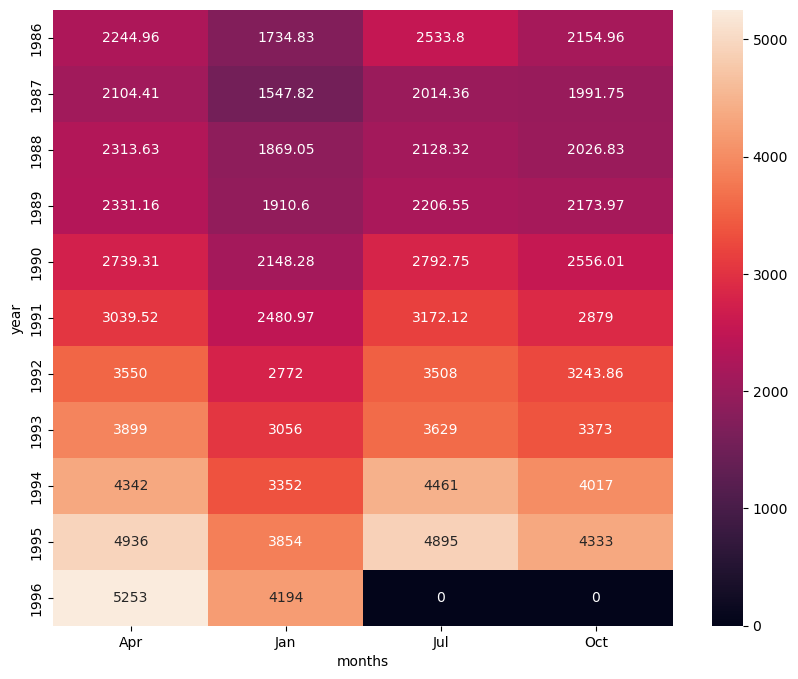

In [24]:
plt.figure(figsize=(10,8))
heatmap_Y_month = pd.pivot_table(data=data1, values="Sales", index="year", columns="months", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_Y_month, annot=True, fmt="g")

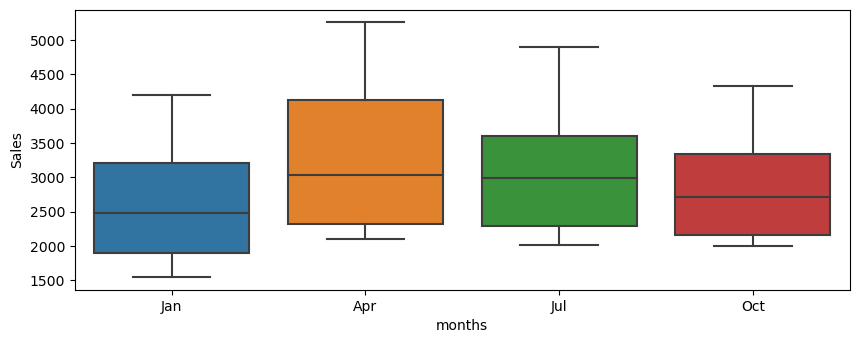

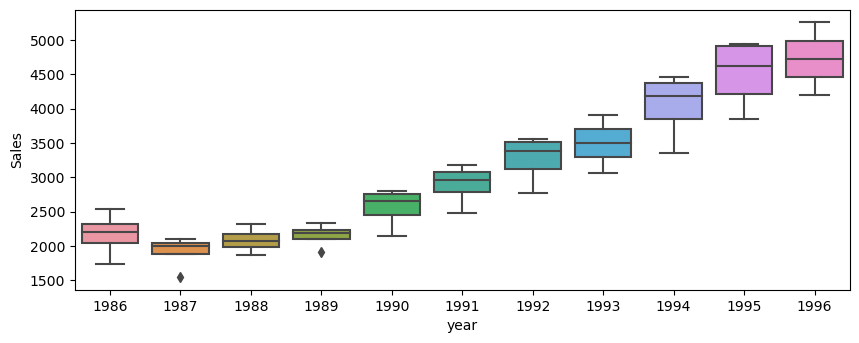

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="months", y="Sales", data = data1)
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(212)
sns.boxplot(x="year", y="Sales", data = data1)
plt.show()

<AxesSubplot:xlabel='year', ylabel='Sales'>

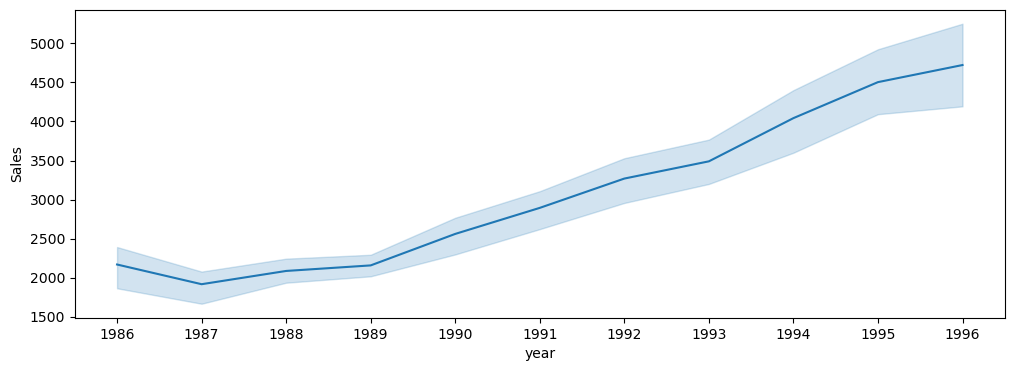

In [26]:
plt.figure(figsize=(12,4))
sns.lineplot(x="year", y="Sales", data=data1)

#### From all the above graphs we can say that the Cocacola sales data has an upward exponential trend with multiplicative seasonality.

### Splitting Data

In [27]:
Train = data1.head(38)
Test = data1.tail(4)

### Evaluation Metric RMSE & MAPE

In [28]:
def RMSE(pred, org):
    temp = np.mean((pred-org)**2)
    return np.sqrt(temp)

In [29]:
def MAPE(pred, org):
    temp = np.abs(((pred-org)/org)*100)
    return np.mean(temp)

#### Building and Comparing Multiple Models to find out best model for Forecasting

### Linear model

In [30]:
model_linear = smf.ols("Sales~t", data=Train).fit()
pred_linear = pd.Series(model_linear.predict(pd.DataFrame(Test["t"])))
pred_linear

38    4145.466199
39    4213.536208
40    4281.606217
41    4349.676226
dtype: float64

In [31]:
rmse_linear = RMSE(pred_linear, Test['Sales'])
rmse_linear

591.5532957485534

In [32]:
mape_linear = MAPE(pred_linear, Test['Sales'])
mape_linear

9.3386221887829

### Exponential model

In [33]:
model_expo = smf.ols("log_Sales~t", data=Train).fit()
pred_expo = pd.Series(model_expo.predict(pd.DataFrame(Test["t"])))
pred_expo = np.exp(pred_expo)
pred_expo

38    4295.822022
39    4399.046102
40    4504.750549
41    4612.994962
dtype: float64

In [34]:
rmse_expo = RMSE(pred_expo, Test['Sales'])
rmse_expo

466.2479731321065

In [35]:
mape_expo = MAPE(pred_expo, Test['Sales'])
mape_expo

8.33947201195749

### Quadratic Model

In [36]:
model_quad = smf.ols("Sales~t+t_squared", data=Train).fit()
pred_quad = pd.Series(model_quad.predict(pd.DataFrame(Test[["t","t_squared"]])))
pred_quad

38    4669.104172
39    4817.733869
40    4970.391551
41    5127.077217
dtype: float64

In [37]:
rmse_quad = RMSE(pred_quad, Test['Sales'])
rmse_quad

475.56183519820195

In [38]:
mape_quad = MAPE(pred_quad, Test['Sales'])
mape_quad

9.177743216720788

### Additive Seasonality

In [39]:
model_add_seas = smf.ols("Sales~Apr+Jan+Jul+Oct",data=Train).fit()
pred_add_seas = pd. Series(model_add_seas.predict(pd.DataFrame(Test[['Apr', 'Jan','Jul', 'Oct']])))
pred_add_seas

38    2938.434220
39    2712.930886
40    2472.555199
41    3150.000098
dtype: float64

In [40]:
rmse_add_seas = RMSE(pred_add_seas, Test['Sales'])
rmse_add_seas

1860.0238154374442

In [41]:
mape_add_seas = MAPE(pred_add_seas, Test['Sales'])
mape_add_seas

39.609867065940406

### Additive Seasonality with Quadratic trend

In [42]:
model_add_seas_quad = smf.ols("Sales~t+t_squared+Apr+Jan+Jul+Oct", data=Train).fit()
pred_add_seas_quad = pd.Series(model_add_seas_quad.predict(pd.DataFrame(Test[["t","t_squared",'Apr', 'Jan','Jul', 'Oct']])))
pred_add_seas_quad

38    4852.677797
39    4709.186074
40    4638.364982
41    5406.022652
dtype: float64

In [43]:
rmse_add_seas_quad = RMSE(pred_add_seas_quad, Test['Sales'])
rmse_add_seas_quad

301.73800721461714

In [44]:
mape_add_seas_quad = MAPE(pred_add_seas_quad, Test['Sales'])
mape_add_seas_quad

5.76369821517656

### Multiplicative Seasonality

In [45]:
model_mul_seas = smf.ols("log_Sales~Apr+Jan+Jul+Oct",data=Train).fit()
pred_mul_seas = pd. Series(model_mul_seas.predict(pd.DataFrame(Test[['Apr', 'Jan','Jul', 'Oct']])))
pred_mul_seas = np.exp(pred_mul_seas)
pred_mul_seas

38    2841.058902
39    2634.665177
40    2370.087030
41    3019.186717
dtype: float64

In [46]:
rmse_mul_seas = RMSE(pred_mul_seas, Test['Sales'])
rmse_mul_seas

1963.389640056338

In [47]:
mape_mul_seas = MAPE(pred_mul_seas, Test['Sales'])
mape_mul_seas

41.79212232383776

### Multiplicative Additive Seasonality

In [48]:
model_mul_add_seas = smf.ols("log_Sales~t+Apr+Jan+Jul+Oct",data=Train).fit()
pred_mul_add_seas = pd.Series(model_mul_add_seas.predict(pd.DataFrame(Test[["t", 'Apr', 'Jan','Jul', 'Oct']])))
pred_mul_add_seas = np.exp(pred_mul_add_seas)
pred_mul_add_seas

38    4555.076459
39    4224.164912
40    3983.650878
41    5074.659987
dtype: float64

In [49]:
rmse_mul_add_seas = RMSE(pred_mul_add_seas, Test['Sales'])
rmse_mul_add_seas

225.52439056170638

In [50]:
mape_mul_add_seas = MAPE(pred_mul_add_seas, Test['Sales'])
mape_mul_add_seas

4.4666408255742525

### Building models using Exponential Smoothing

In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Simple Exponential method

In [52]:
model_simple_expo = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_simple_expo = model_simple_expo.predict(start=Test.index[0], end=Test.index[-1])
pred_simple_expo

38    4020.476391
39    4020.476391
40    4020.476391
41    4020.476391
dtype: float64

In [53]:
rmse_simple_expo = RMSE(pred_simple_expo, Test['Sales'])
rmse_simple_expo

776.4804310210843

In [54]:
mape_simple_expo = MAPE(pred_simple_expo, Test['Sales'])
mape_simple_expo

13.169736669204205

### Holt method

In [55]:
model_holt = Holt(Train["Sales"]).fit(smoothing_trend=0.2)
pred_holt = model_holt.predict(start=Test.index[0], end=Test.index[-1])
pred_holt

38    4812.431868
39    4978.272043
40    5144.112218
41    5309.952393
dtype: float64

In [56]:
rmse_holt = RMSE(pred_holt, Test['Sales'])
rmse_holt

576.4439060534547

In [57]:
mape_holt = MAPE(pred_holt, Test['Sales'])
mape_holt

10.07927359016563

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [58]:
model_holt_expo = ExponentialSmoothing(Train["Sales"], seasonal="mul", trend="add", seasonal_periods=12).fit()
pred_holt_expo = model_holt_expo.predict(start=Test.index[0], end=Test.index[-1])
pred_holt_expo

38    4947.696993
39    4503.777626
40    4018.469282
41    5141.936966
dtype: float64

In [59]:
rmse_holt_expo = RMSE(pred_holt_expo, Test['Sales'])
rmse_holt_expo

137.01094929228174

In [60]:
mape_holt_expo = MAPE(pred_holt_expo, Test['Sales'])
mape_holt_expo

2.8293581595811097

### ARIMA model

In [61]:
from math import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

### Making Data Stationary

In [62]:
data2 = data1[["Date", "Sales"]]
data2.to_csv("data3.csv", index=False)
series = read_csv("data3.csv", index_col=0)
series.head()

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


<AxesSubplot:xlabel='Date'>

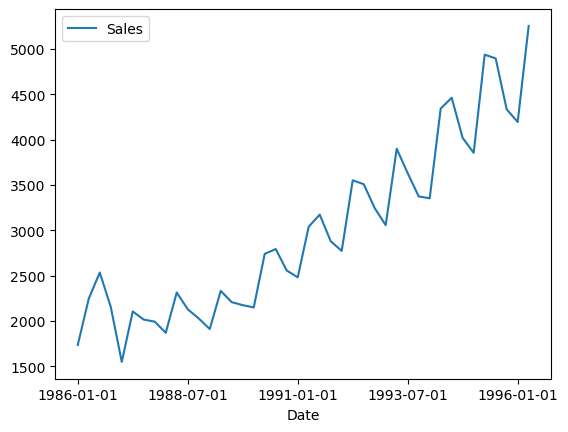

In [63]:
series.plot()

### Evaluation of Stationary Data

In [64]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(series['Sales'])

#### Ho: It is non stationary.

H1: It is stationary.

In [65]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [66]:
adfuller_test(series['Sales'])

ADF Test Statistic : 1.3094210180613524
p-value : 0.9966611674081021
#Lags Used : 7
Number of Observations Used : 34
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Log Transform

In [67]:
series['log_Sales'] = np.log(series['Sales'])
series.head()

,Sales,log_Sales
Date,,
1986-01-01,1734.827000,7.458663
1986-04-01,2244.960999,7.716443
1986-07-01,2533.804993,7.837477
1986-10-01,2154.962997,7.675529
1987-01-01,1547.818996,7.344602


In [68]:
adfuller_test(series['log_Sales'])

ADF Test Statistic : 0.19282044038830626
p-value : 0.9718560272326244
#Lags Used : 6
Number of Observations Used : 35
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Square Root Transform

In [69]:
series['sqrt_Sales'] = np.sqrt(series['Sales'])
series.head()

,Sales,log_Sales,sqrt_Sales
Date,,,
1986-01-01,1734.827000,7.458663,41.651254
1986-04-01,2244.960999,7.716443,47.381019
1986-07-01,2533.804993,7.837477,50.336915
1986-10-01,2154.962997,7.675529,46.421579
1987-01-01,1547.818996,7.344602,39.342331


In [70]:
adfuller_test(series['sqrt_Sales'])

ADF Test Statistic : 0.828594117057878
p-value : 0.9920839872020732
#Lags Used : 6
Number of Observations Used : 35
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Combination of SQRT and LOG Transform

In [71]:
from numpy import sqrt
from numpy import log

series['comb_Sales'] = sqrt(log(series['Sales']))
series.head()

,Sales,log_Sales,sqrt_Sales,comb_Sales
Date,,,,
1986-01-01,1734.827000,7.458663,41.651254,2.731055
1986-04-01,2244.960999,7.716443,47.381019,2.777849
1986-07-01,2533.804993,7.837477,50.336915,2.799549
1986-10-01,2154.962997,7.675529,46.421579,2.770474
1987-01-01,1547.818996,7.344602,39.342331,2.710093


In [72]:
adfuller_test(series['comb_Sales'])

ADF Test Statistic : 0.10566372750551696
p-value : 0.9664456623872838
#Lags Used : 6
Number of Observations Used : 35
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

In [73]:
series['Seasonal_Difference']=series['Sales']-series['Sales'].shift(4)
series.head(6)

,Sales,log_Sales,sqrt_Sales,comb_Sales,Seasonal_Difference
Date,,,,,
1986-01-01,1734.827000,7.458663,41.651254,2.731055,NaN
1986-04-01,2244.960999,7.716443,47.381019,2.777849,NaN
1986-07-01,2533.804993,7.837477,50.336915,2.799549,NaN
1986-10-01,2154.962997,7.675529,46.421579,2.770474,NaN
1987-01-01,1547.818996,7.344602,39.342331,2.710093,-187.008004
1987-04-01,2104.411995,7.651791,45.873871,2.766187,-140.549004


In [74]:
adfuller_test(series['Seasonal_Difference'].dropna())

ADF Test Statistic : -2.6101117501343674
p-value : 0.09092533175538114
#Lags Used : 0
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Combination of Log Transform with Differencing

In [75]:
series['log_Sales_Difference']=series['log_Sales']-series['log_Sales'].shift(4)
series.head(6)

,Sales,log_Sales,sqrt_Sales,comb_Sales,Seasonal_Difference,log_Sales_Difference
Date,,,,,,
1986-01-01,1734.827000,7.458663,41.651254,2.731055,NaN,NaN
1986-04-01,2244.960999,7.716443,47.381019,2.777849,NaN,NaN
1986-07-01,2533.804993,7.837477,50.336915,2.799549,NaN,NaN
1986-10-01,2154.962997,7.675529,46.421579,2.770474,NaN,NaN
1987-01-01,1547.818996,7.344602,39.342331,2.710093,-187.008004,-0.114061
1987-04-01,2104.411995,7.651791,45.873871,2.766187,-140.549004,-0.064652


In [76]:
adfuller_test(series['log_Sales_Difference'].dropna())

ADF Test Statistic : -5.238545700222842
p-value : 7.3311859749547446e-06
#Lags Used : 2
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


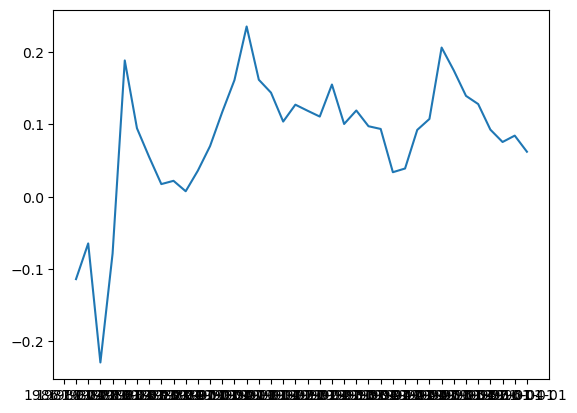

In [77]:
plt.plot(series['log_Sales_Difference'])
plt.show()

### Splitting Data

In [78]:
series1 = read_csv("data3.csv", index_col=0)
split_point = len(series1)-4
dataset, validation = series1[0:split_point], series1[split_point:]
print("dataset %d, validation %d" % (len(dataset), len(validation)))

dataset 38, validation 4


In [79]:
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

### Persistence/ Base model

In [80]:
train = read_csv("dataset.csv", header=None, index_col=0, parse_dates=True, squeeze=True)

X = train.values
X = X.astype("float32")
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [81]:
history = [X for X in train]
predictions = list()

for i in range (len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    obs = test[i]
    history.append(obs) 
    print(">Predicted=%.3f, Expected=%.3f" % (yhat, obs))
        
rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE: %.3f" % rmse)

>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
RMSE: 483.351


### ARIMA Hyperparameters

In [82]:
def evaluate_arima_model(X, arima_order):
    X = X.astype("float32")
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    
    history = [X for X in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

### Grid search for p,d,q values

In [83]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype("float32")
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMA%S RMSE=%.3f" % (order, rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" % (best_cfg, best_score))

In [84]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


### Build Model based on the optimized values

In [85]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype("float32")
test = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [86]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(X, order=(4, 1, 0)).fit()
forecast = model_arima.forecast(steps=4)[0]
forecast

4991.131940050793

In [87]:
rmse_arima = RMSE(forecast, test[1])
rmse_arima

658.1319400507928

In [88]:
mape_arima = MAPE(forecast, test[1])
mape_arima

15.188828526443404

### Conclusion

In [89]:
output = pd.DataFrame({"Models": pd.Series(["model_linear", "model_expo", "model_quad", "model_add_seas", "model_add_seas_quad", "model_mul_seas", "model_mul_add_seas", "model_simple_expo", "model_holt", "model_holt_expo", "model_arima"]),
                      "RMSE_values": pd.Series([rmse_linear, rmse_expo, rmse_quad, rmse_add_seas, rmse_add_seas_quad, rmse_mul_seas, rmse_mul_add_seas, rmse_simple_expo, rmse_holt, rmse_holt_expo, rmse_arima]),
                      "MAPE_values": pd.Series([mape_linear, mape_expo, mape_quad, mape_add_seas, mape_add_seas_quad, mape_mul_seas, mape_mul_add_seas, mape_simple_expo, mape_holt, mape_holt_expo, mape_arima])})

In [90]:
output.sort_values(["RMSE_values"])

,Models,RMSE_values,MAPE_values
9,model_holt_expo,137.010949,2.829358
6,model_mul_add_seas,225.524391,4.466641
4,model_add_seas_quad,301.738007,5.763698
1,model_expo,466.247973,8.339472
2,model_quad,475.561835,9.177743
8,model_holt,576.443906,10.079274
0,model_linear,591.553296,9.338622
10,model_arima,658.131940,15.188829
7,model_simple_expo,776.480431,13.169737
3,model_add_seas,1860.023815,39.609867


#### Conclusion
Model no 9 - 'model_holt_expo' built with 'Holts winter exponential smoothing' method gives the best RMSE and MAPE values, hence this is the best model for Forecasting of CocaCola Sales dataset.